In [1]:
import pickle
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import six

### Load aspects and terms dictionary

In [2]:
aspects = pickle.load(open("../pickled_files/primanti_aspect.pkl", 'rb'))
terms = pickle.load(open("../pickled_files/primanti_terms.pkl", 'rb'))

### Create aspects DataFrame with Transpose of Aspects Dictionary

In [3]:
aspects_df = pd.DataFrame(aspects).T

In [4]:
aspects_df

,neg,pos
ambience,390.500,1077.750
food,1275.125,2506.625
price,47.500,211.750
service,267.000,501.250
misc,63.000,62.000


### Add normalized positive and negative aspects columns

In [5]:
aspects_df["total"] = aspects_df.neg+aspects_df.pos
aspects_df['pos_norm'] = aspects_df.pos/aspects_df.total
aspects_df['neg_norm'] = aspects_df.neg/aspects_df.total

In [6]:
aspects_df

,neg,pos,total,pos_norm,neg_norm
ambience,390.500,1077.750,1468.25,0.734037,0.265963
food,1275.125,2506.625,3781.75,0.662821,0.337179
price,47.500,211.750,259.25,0.816779,0.183221
service,267.000,501.250,768.25,0.652457,0.347543
misc,63.000,62.000,125.00,0.496000,0.504000


In [7]:
pos = aspects_df.pos_norm.tolist()
neg = aspects_df.neg_norm.tolist()

### convert normalized columns in percentages

In [8]:
for i in range(len(pos)):
    pos[i] = pos[i]*100
    neg[i]= neg[i]*100

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='pos', x=['ambience', 'food', 'price', 'service', 'misc'], y=pos),
    go.Bar(name='neg', x=['ambience', 'food', 'price', 'service', 'misc'], y=neg)
])
# Change the bar mode
fig.update_layout(barmode='stack' ,title = "Stacked bar of normalized positive and negative sentiments according to aspects")
fig.show()

In [ ]:
aspects=['ambience', 'food', 'price', 'service', 'misc']

fig = go.Figure(data=[
    go.Bar(name='pos', x=aspects, y=aspects_df['pos']),
    go.Bar(name='neg', x=aspects, y=aspects_df['neg'])
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Total negative and positive sentiments for according to aspects")
fig.show()

### Table renderer for most positive and most negative terms

In [11]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
					 header_color='#40466e', row_colors=['#f1f1f2', 'w'],
					 edge_color='w',bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

### Top 20 positive and top 10 negative terms for each aspect

In [12]:
highest = defaultdict()
lowest = defaultdict()
for i in terms:
    if terms[i]:
        highest[i] = terms[i].most_common()[:20]
        lowest[i] = terms[i].most_common()[-10:]

In [13]:
highest_df = pd.DataFrame(highest)
lowest_df = pd.DataFrame(lowest)

### Rendering table for best terms

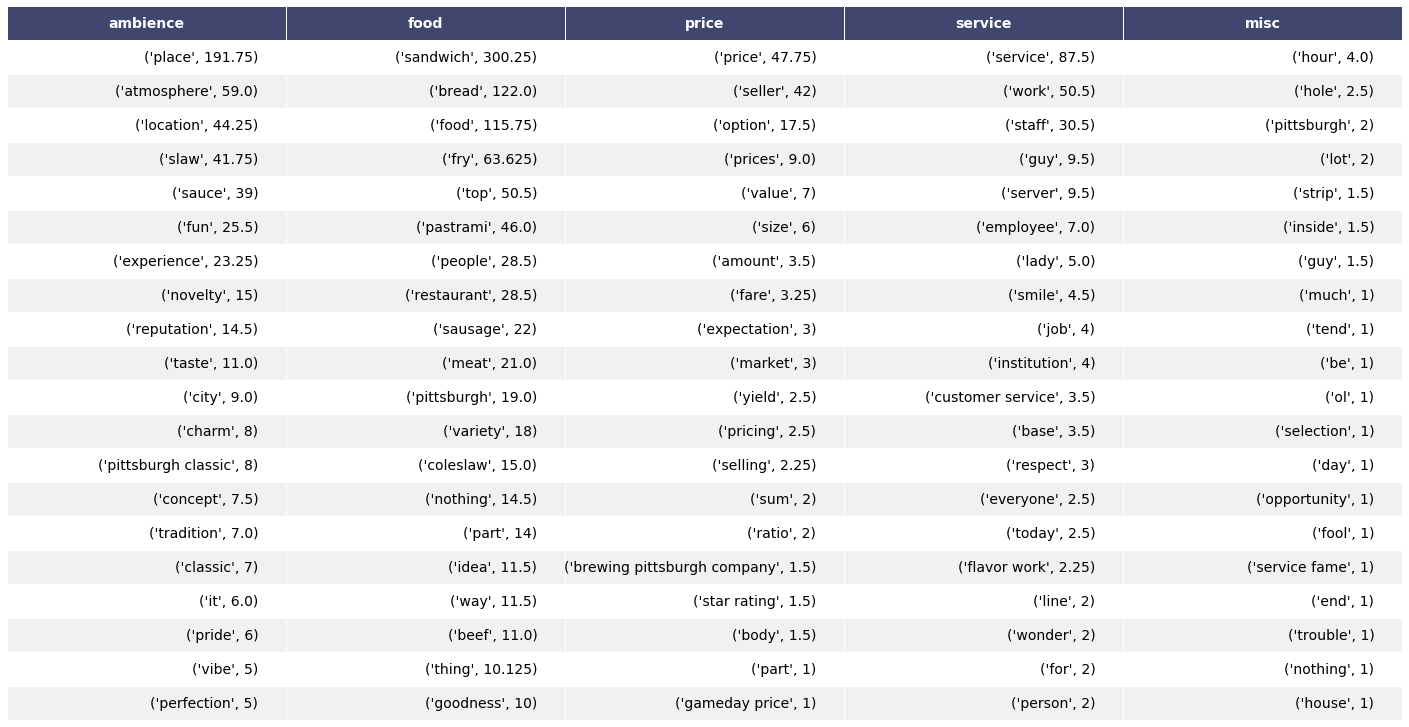

In [14]:
render_mpl_table(highest_df, header_columns=0, col_width=5.0)

### Rendering table for worst terms

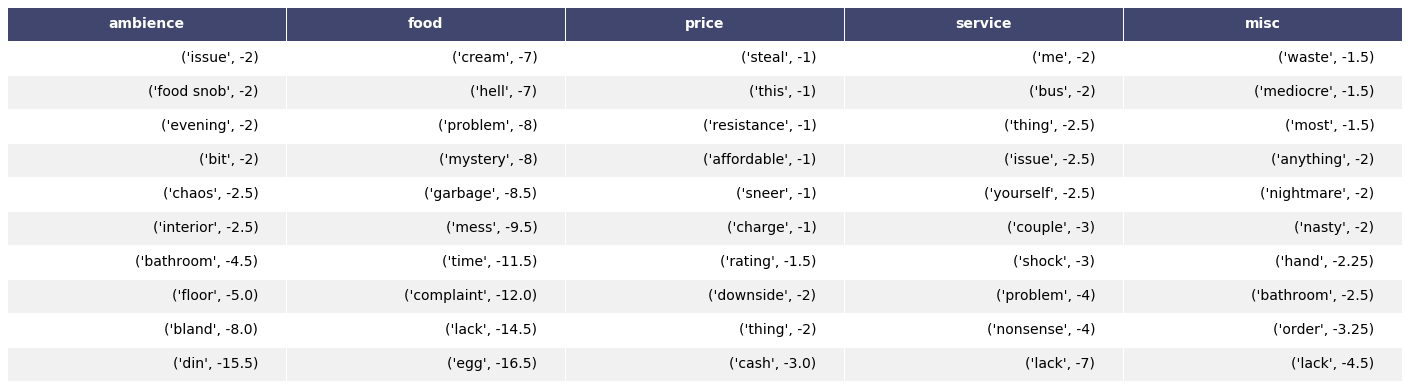

In [15]:
render_mpl_table(lowest_df, header_columns=0, col_width=5.0)